In [1]:
from HeaderP import *

In [34]:
import illustris_python as il

In [35]:
basePath = '/Users/yl4331/Desktop/TNGRbirth/L35n2160TNG/output'

In [36]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloFlag']

In [37]:
subhalos = il.groupcat.loadSubhalos(basePath,99,fields=fields)

In [38]:
sum(subhalos['SubhaloFlag']==1)

5686764

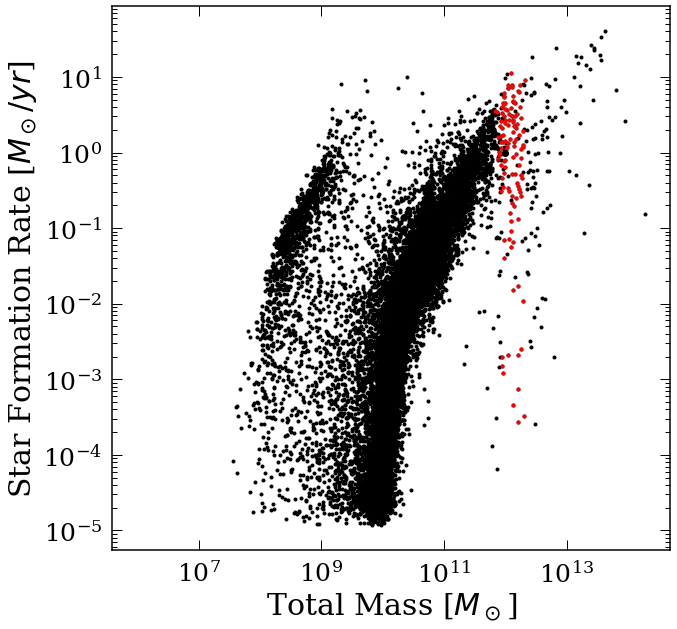

In [54]:
import matplotlib.pyplot as plt
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'k.')
plt.plot(mass_msun[subfindids],subhalos['SubhaloSFRinRad'][subfindids],'r.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')
plt.plot(1e12,1,'ko')

In [55]:
h=0.704
GroupFirstSub = il.groupcat.loadHalos(basePath,99,fields=['GroupFirstSub','Group_M_Crit200'])
m=(GroupFirstSub['Group_M_Crit200']*1e10/h>8e11)&(GroupFirstSub['Group_M_Crit200']*1e10/h<2e12)
subfindids=GroupFirstSub['GroupFirstSub'][m]

np.shape(subfindids), subfindids


((141,),
 array([440407, 446665, 449658, 454171, 455291, 466549, 467415, 469487,
        473329, 476266, 477328, 478216, 479290, 479938, 481428, 482889,
        484448, 485056, 486046, 486917, 487742, 488530, 489206, 490079,
        490814, 491426, 492244, 492876, 493433, 494011, 494709, 495451,
        496186, 496788, 497557, 498522, 499021, 499704, 500576, 501208,
        501725, 502371, 502995, 503437, 503987, 504559, 505100, 505586,
        506151, 506720, 507292, 507784, 508538, 509091, 509709, 510273,
        510585, 511303, 511920, 512425, 513105, 513845, 514272, 514829,
        515296, 515695, 516101, 516760, 517271, 517899, 518120, 518682,
        519311, 520885, 521429, 521803, 522530, 522983, 523548, 523889,
        524506, 525002, 525533, 526029, 526478, 526879, 527309, 527839,
        528322, 528836, 529365, 529855, 530330, 530852, 531320, 531910,
        532301, 532760, 533060, 534628, 535050, 535410, 535774, 536654,
        537236, 537488, 537941, 538370, 538905, 539333,

In [62]:

starcount=np.zeros(len(subfindids))
for ii in trange(len(subfindids)):
    stars = il.snapshot.loadHalo(basePath,99,subfindids[ii],'star')
    starcount[ii]=stars['count']
    

100%|██████████| 141/141 [00:00<00:00, 446.10it/s]


In [64]:
import h5py
f=h5py.File('/Users/yl4331/Desktop/TNGRbirth/L35n2160TNG/postprocessing/StellarAssembly/stars_099.hdf5','r')

In [96]:
f2=h5py.File('/Users/yl4331/Desktop/TNGRbirth/L35n2160TNG/output/snapdir_099/snap_099.0.hdf5','r')

In [85]:
f2=h5py.File('/Users/yl4331/Desktop/TNGRbirth/L35n2160TNG/postprocessing/offsets/offsets_099.hdf5')

In [95]:
f2['Header'].attrs['FileOffsets_'+type]

KeyError: "Unable to open object (object 'Header' doesn't exist)"

In [65]:
f['SubfindID']

<HDF5 dataset "SubfindID": shape (1289575331,), type "<i4">

In [71]:
f.keys()

<KeysViewHDF5 ['AccretionOrigin', 'AfterInfall', 'DistanceAtFormation', 'InSitu', 'MergerMassRatio', 'ParticleID', 'SnapNumAtFormation', 'SubfindID', 'SubfindIDAtFormation']>

In [66]:
dset = f['SubfindID']

In [67]:
subfildid=np.array(dset)

In [73]:

len(subfildid[subfildid==subfindids[0]])


1574788

In [14]:
rbirth=np.array(f['DistanceAtFormation'])

In [15]:
int(np.sqrt(len(rbirth)))

35910

In [16]:
rbirth=rbirth[rbirth<100]

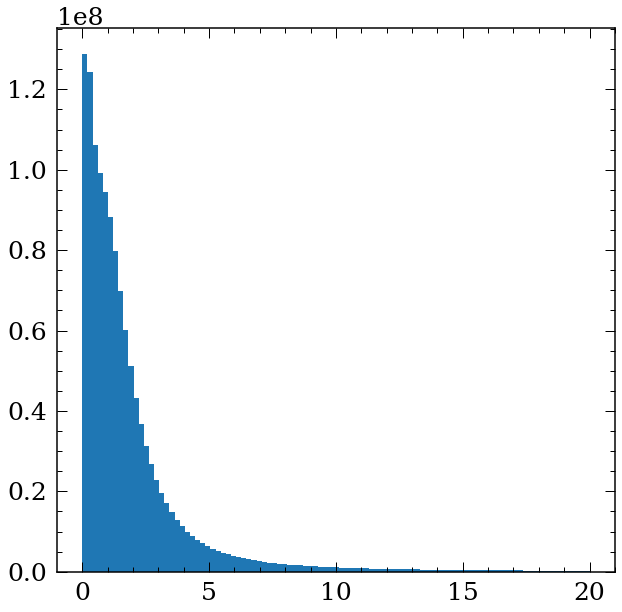

In [17]:
plt.hist(rbirth,bins=np.linspace(0,20,100));